In [3]:
import os

In [4]:
from sturdy_barnacle.image_processor import ImageProcessor


directory_path = '/Users/mamduhzabidi/Pictures/Photos Library.photoslibrary/originals/0/'

files = [file for file in os.listdir(directory_path) if file.lower().endswith('.jpeg')]

In [5]:
for i in range(5):
    image_path = os.path.join(directory_path, files[i])
    image_processor=ImageProcessor(image_path)
    print(image_processor.describe_image())    

Initializing shared resources for the first time...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

a black and white photo of people walking down a narrow street

a view of a building from inside a doorway

a group of people sitting around a table with a cake

a gray sky

a large stone building



In [6]:
for i in range(5):
    image_path = os.path.join(directory_path, files[i])
    image_processor=ImageProcessor(image_path)
    print(image_processor.detect_objects())

/Users/mamduhzabidi/Documents/GitHub/sturdy-barnacle/myenv/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Counter({'person': 13, 'handbag': 3})
Counter({'person': 5})
Counter({'person': 6, 'knife': 2, 'bowl': 2, 'tv': 1, 'dining table': 1, 'cake': 1})
Counter({'car': 2, 'person': 2})
Counter({'umbrella': 1})


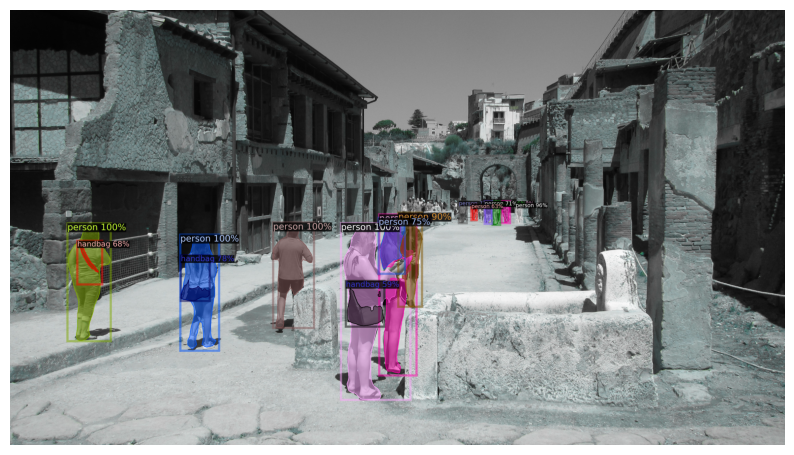

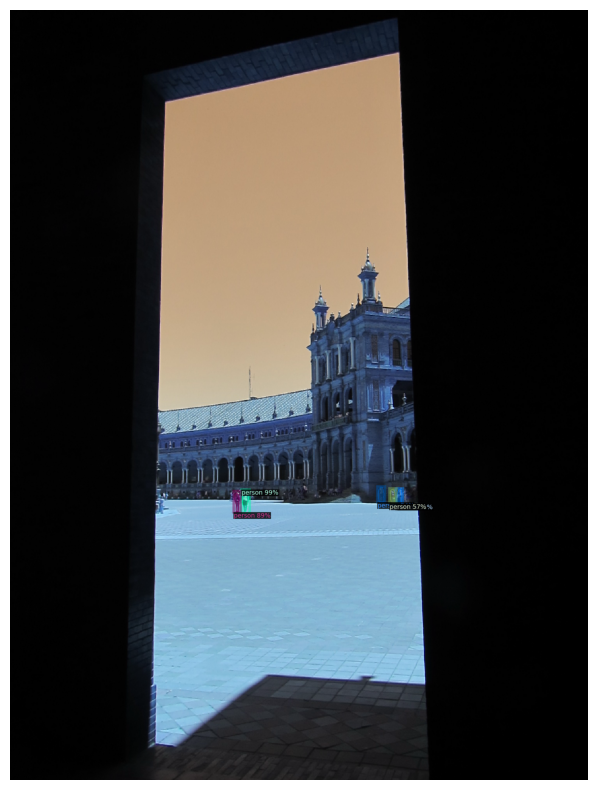

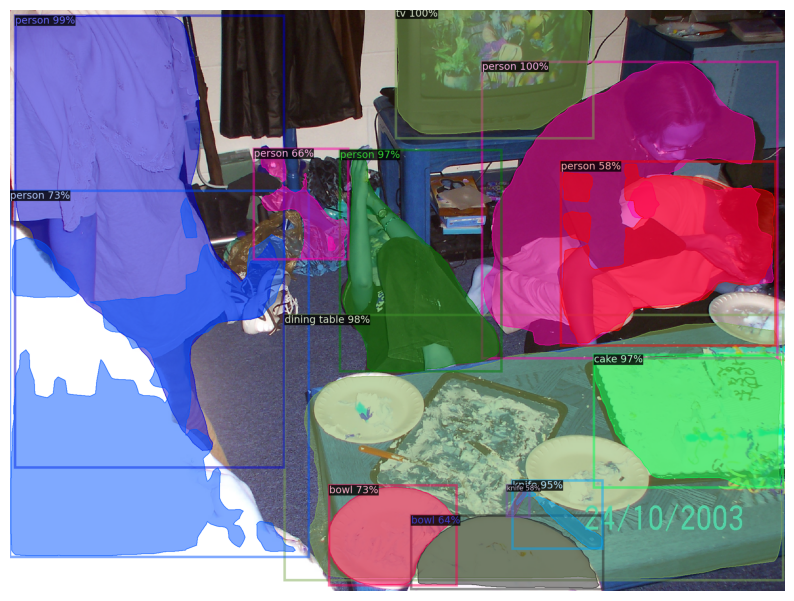

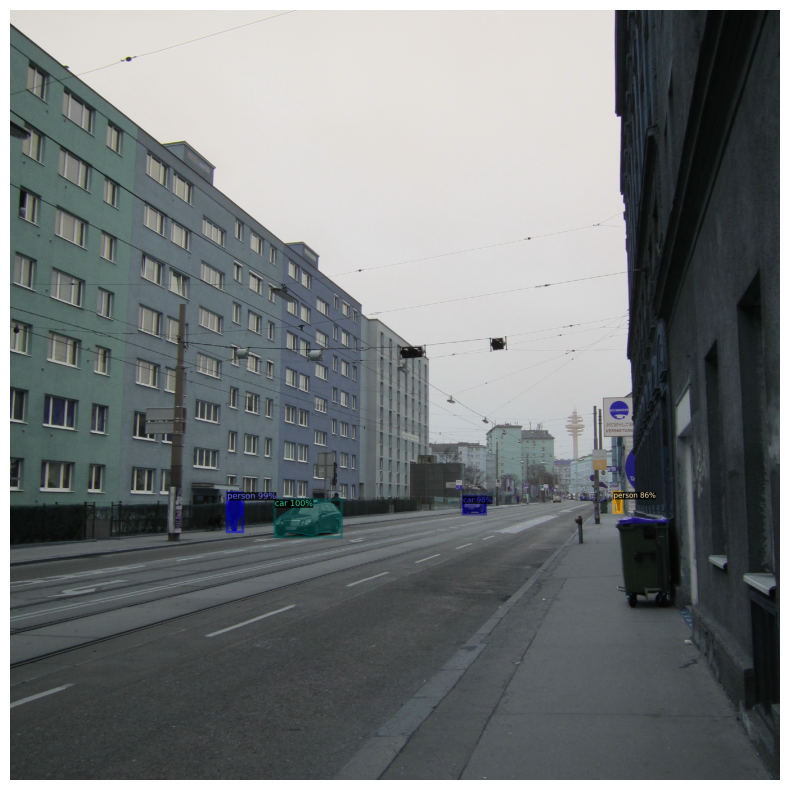

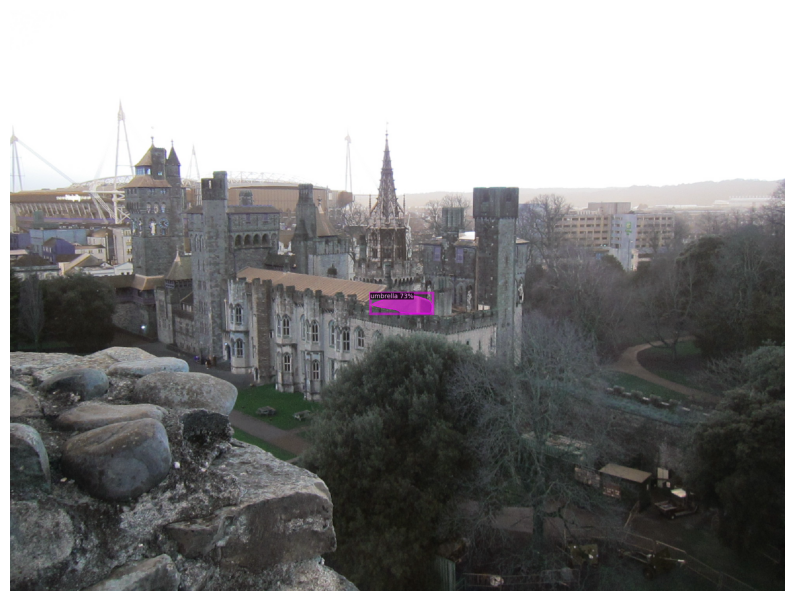

In [8]:
for i in range(5):
    image_path = os.path.join(directory_path, files[i])
    image_processor=ImageProcessor(image_path)
    image_processor.visualize_image()